# CSE 252B: Computer Vision II, Winter 2018 – Assignment 5
### Instructor: Ben Ochoa
### Due: Wednesday, March 21, 2018, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX. Remember to show work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. Ask the instructor if in doubt.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Point on line closest to the origin (5 points)
  Given a line $\boldsymbol{l} = (a, b, c)^\top$, show that the point on
  $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ (hint: this calculation is needed in the
  two-view optimal triangulation method used below).

Solution:

\begin{eqnarray}
\mathbf{l} & =& (a,b,c)^T \\
\mathbf{x} &=& (x,y,1)^T \\
\mathbf{l}^T\mathbf{x} &=& 0
\end{eqnarray}
So we have
\begin{eqnarray}
 ax+by+c = 0 \\
 y = -\frac{c}{b} - \frac{ax}{b}\\
 \end{eqnarray}
 The distance between point and origin is 
 
\begin{eqnarray}
R &=& x^2 + y^2\\
&=& x^2 + (-\frac{c}{b} - \frac{ax}{b})^2\\
&=&\frac{a^2 + b^2}{b^2}x^2 +\frac{2ac}{b^2}x +\frac{c^2}{b^2}\\
\end{eqnarray}
So we get $R_{min}$ when
\begin{eqnarray}
x_{min} &=& - \frac{\frac{2ac}{b^2}}{\frac{2(a^2+b^2)}{b^2}}\\
&=& -\frac{ac}{a^2+b^2}\\
\Rightarrow y_{min} &=& -\frac{c}{b} - \frac{ax_{min}}{b}\\
&=& -\frac{c}{b} + \frac{a^2c}{b(a^2+b^2)}\\
&=& -\frac{bc}{a^2+b^2}
\end{eqnarray}
So the point is $\boldsymbol{x} = (-ac, -bc, a^2+b^2)^\top$


## Programing
Download input data from the course website. The file IMG_5030.JPG contains image 1 and the file IMG_5031.JPG contains image 2.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# open the input images
I1 = np.array(Image.open('IMG_5030.JPG'), dtype='float')/255.
I2 = np.array(Image.open('IMG_5031.JPG'), dtype='float')/255.

# Display the input images
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(I1)
plt.subplot(1,2,2)
plt.imshow(I2)
plt.show()

## Problem 2 (Programing): Feature Detection (20 points)
For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
around 1350–1400 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

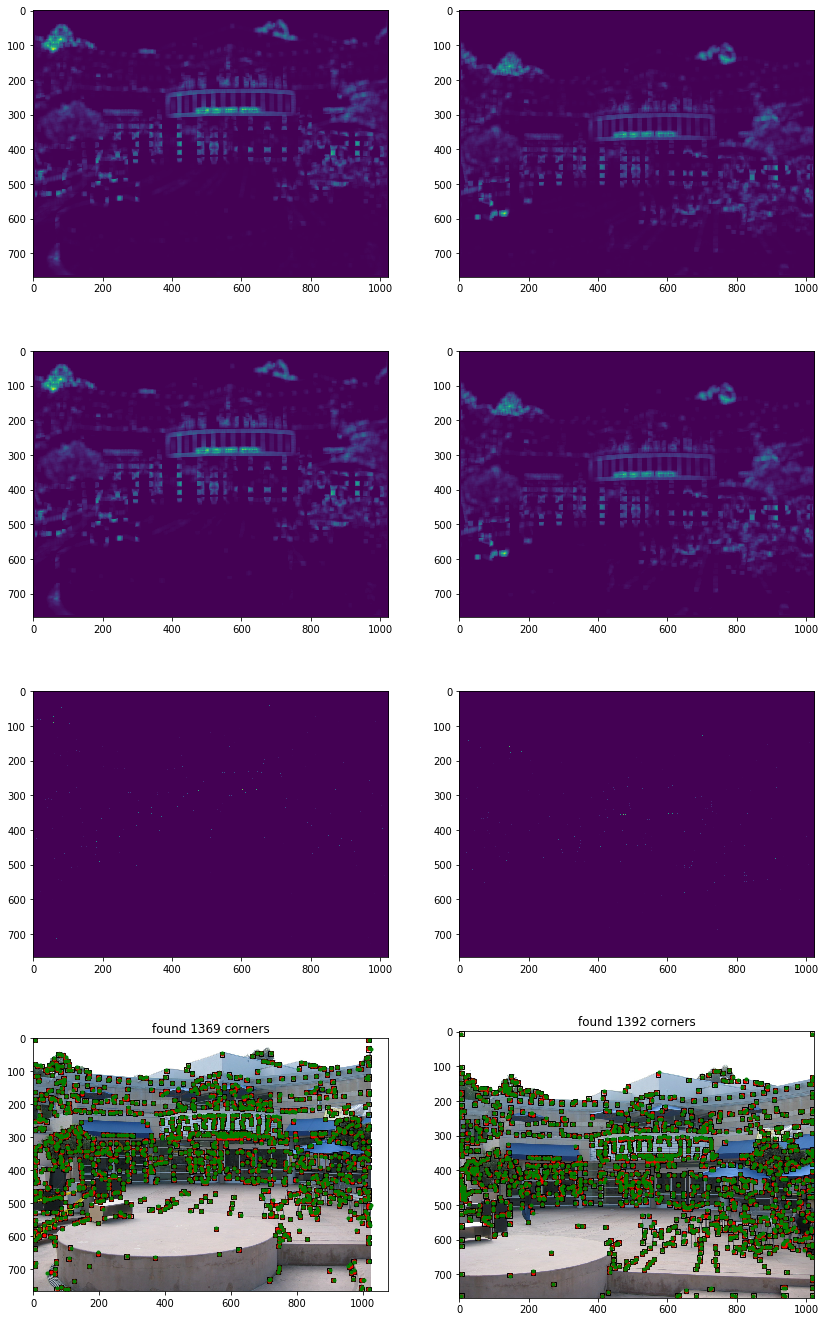

In [2]:
def corner(I, w, t, w_nms):
    # inputs: 
    # I is the input image (may be mxn for BW or mxnx3 for RGB)
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the window used for nonmaximal supression
    # outputs:
    # J0 is the mxn image of minor eigenvalues of N before thresholding
    # J1 is the mxn image of minor eigenvalues of N after thresholding
    # J2 is the mxn image of minor eigenvalues of N after nonmaximal supression
    # pts0 is the 2xk list of coordinates of (pixel accurate) corners
    #     (ie. coordinates of nonzero values of J2)
    # pts1 is the 2xk list of coordinates of subpixel accurate corners
    #     found using the Forstner detector
    
    """your code here"""
    if len(I.shape) == 3:
        r,g,b = I[:,:,0], I[:,:,1], I[:,:,2]
        I = 0.2989 * r + 0.5807 * g + 0.1140 * b
    m,n = I.shape[:2]
    
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))
    J2 = np.zeros((m,n))
    
    w_2 = (w - 1) // 2
    w_num_2 = (w_nms - 1) // 2
    
    thres = t
    kx = np.array([-1,8,0,-8,1]) / 12
    
    Ix0 = np.zeros((m,n))
    Iy0 = np.zeros((n,m))
    
    It = I.T
    for i in range(I.shape[0]):
        Ix0[i] = np.convolve(kx, I[i], 'same')
    for i in range(I.shape[1]):
        Iy0[i] = np.convolve(kx, It[i], 'same')
    Iy0 = Iy0.T
    
    IxIx = np.multiply(Ix0, Ix0)
    IxIy = np.multiply(Ix0, Iy0)
    IyIx = np.multiply(Iy0, Ix0)
    IyIy = np.multiply(Iy0, Iy0)
    
    N = np.zeros((2,2))
    
    pts0 = np.zeros((2,1), dtype = int)
    pts1 = np.zeros((2,1), dtype = int)
    
    N2 = np.zeros((2,1))
    
    for i in range(w_2, m - w_2):
        for j in range(w_2, n - w_2):
            N[0][0] = np.sum(IxIx[i-w_2:i+w_2+1,j-w_2:j+w_2+1])/(w*w)
            N[0][1] = np.sum(IxIy[i-w_2:i+w_2+1,j-w_2:j+w_2+1])/(w*w)
            N[1][0] = np.sum(IyIx[i-w_2:i+w_2+1,j-w_2:j+w_2+1])/(w*w)
            N[1][1] = np.sum(IyIy[i-w_2:i+w_2+1,j-w_2:j+w_2+1])/(w*w)
    
            lbd_l = (np.trace(N) - abs(np.trace(N) ** 2 -\
                   4 * np.linalg.det(N))**0.5) / 2
    
            J0[i][j] = lbd_l

    J1 = np.multiply(J0 > thres, J0)
    
    for y in range(w_num_2, m - w_num_2):
        for x in range(w_num_2, n - w_num_2):
            J2[y][x] = (J1[y][x] == np.max(J1[y-w_num_2:y+w_num_2+1,\
                              x-w_num_2:x+w_num_2+1])) * J1[y][x]
    
    for i in range(w_num_2, m - w_num_2):
        for j in range(w_num_2, n - w_num_2):
            if J2[i][j] > 0:
                pts0 = np.hstack((pts0, np.array([[j],[i]])))
    pts0 = np.delete(pts0, 0, 1)
    
    for k in range(pts0.shape[1]):
        j = pts0[0,k]
        i = pts0[1,k]

        x_temp=np.dot(np.ones((w,1)),np.array([range(i-w_2,i+w_2+1)]))
        y_temp=np.dot(np.ones((w,1)),np.array([range(j-w_2,j+w_2+1)]))
        x_temp=x_temp.transpose()

        
        N[0][0]=np.sum(IxIx[i-w_2:i+w_2+1,j-w_2:j+w_2+1])
        N[0][1]=np.sum(IxIy[i-w_2:i+w_2+1,j-w_2:j+w_2+1])
        N[1][0]=np.sum(IyIx[i-w_2:i+w_2+1,j-w_2:j+w_2+1])
        N[1][1]=np.sum(IyIy[i-w_2:i+w_2+1,j-w_2:j+w_2+1])
        
        N2[0]=np.sum(np.multiply(x_temp,IxIx[i-w_2:i+w_2+1,j-w_2:j+w_2+1])+\
                     np.multiply(y_temp,IxIy[i-w_2:i+w_2+1,j-w_2:j+w_2+1]))
        
        N2[1]=np.sum(np.multiply(x_temp,IxIy[i-w_2:i+w_2+1,j-w_2:j+w_2+1])+\
                     np.multiply(y_temp,IyIy[i-w_2:i+w_2+1,j-w_2:j+w_2+1]))
        
        sub_temp = np.linalg.solve(N,N2)
        sub_pix = np.vstack((sub_temp[1],sub_temp[0]))
        pts1 = np.hstack((pts1, sub_pix))
    pts1 = np.delete(pts1, 0, 1)
    
    return J0, J1, J2, pts0, pts1


# parameters to tune
w=13
t=.00025
w_nms=7

# extract corners
J1_0, J1_1, J1_2, pts1_0, pts1_1 = corner(I1, w, t, w_nms)
J2_0, J2_1, J2_2, pts2_0, pts2_1 = corner(I2, w, t, w_nms)

# Display results
plt.figure(figsize=(14,24))

# show pre-thresholded corner heat map
plt.subplot(4,2,1)
plt.imshow(J1_0)
plt.subplot(4,2,2)
plt.imshow(J2_0)

# show thresholded corner heat map
plt.subplot(4,2,3)
plt.imshow(J1_1)
plt.subplot(4,2,4)
plt.imshow(J2_1)

# show corner heat map after nonmaximal supression
plt.subplot(4,2,5)
plt.imshow(J1_2)
plt.subplot(4,2,6)
plt.imshow(J2_2)

# show corners on origional images
ax = plt.subplot(4,2,7)
plt.imshow(I1)
# draw rectangles of size w around corners
for i in range(pts1_0.shape[1]):
    x,y = pts1_0[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
plt.plot(pts1_0[0,:], pts1_0[1,:], '.r') # display pixel accurate corners
plt.plot(pts1_1[0,:], pts1_1[1,:], '.g') # display subpixel corners
plt.title('found %d corners'%pts1_0.shape[1])
ax = plt.subplot(4,2,8)
plt.imshow(I2)
for i in range(pts2_0.shape[1]):
    x,y = pts2_0[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
plt.plot(pts2_0[0,:], pts2_0[1,:], '.r')
plt.plot(pts2_1[0,:], pts2_1[1,:], '.g')
plt.title('found %d corners'%pts2_0.shape[1])

plt.show()

## Problem 3 (Programing): Feature Matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that around 300 putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

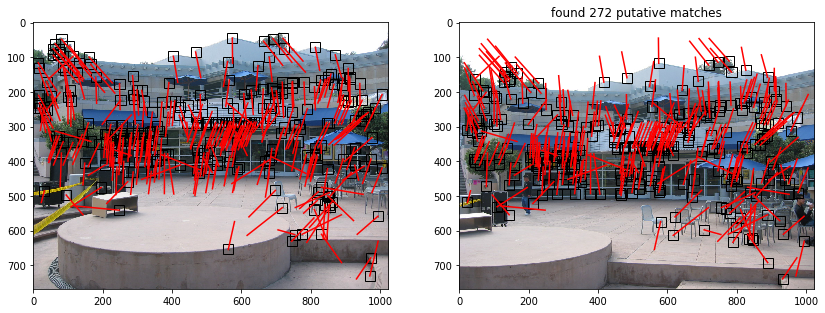

In [3]:
def match(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the proximity threshold
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    # scores is a vector of length k that contains the correlation
    #     coefficients of the matches
    
    """your code here"""

    w_2 = (w - 1) // 2
    m_corr, n_corr = 0, 0
    
    corr_mat = np.zeros((pts1.shape[1], pts2.shape[1])) - 1
    
    if len(I1.shape) == 3:
        r,g,b = I1[:,:,0], I1[:,:,1], I1[:,:,2]
        I1_bw = 0.2989 * r + 0.5870 * g + 0.1140 * b
    if len(I2.shape) == 3:
        r,g,b = I2[:,:,0], I2[:,:,1], I2[:,:,2]
        I2_bw = 0.2989 * r + 0.5870 * g + 0.1140 * b
        
    for i in range(pts1.shape[1]):
        i1 = pts1[0,i]
        j1 = pts1[1,i]
        i1 = int(round(i1))
        j1 = int(round(j1))
    
        if (j1-w_2<0) or (j1+w_2+1>I1.shape[0]) or\
        (i1-w_2 < 0) or (i1 + w_2+1>I1.shape[1]):
            m_corr=m_corr+1
            n_corr=0
            continue
            
        win_temp_bw=I1_bw[j1-w_2:j1+w_2+1,i1-w_2:i1+w_2+1]
        win_mean1_bw=win_temp_bw - np.mean(win_temp_bw)
        #win_sigma1_bw=(np.sum(win_mean1_bw**2))**0.5
        win_sigma1_bw = np.std(win_mean1_bw)
        
        
    
        for j in range(pts2.shape[1]):
            i2 = pts2[0, j]
            j2 = pts2[1, j]
            i2=int(round(i2))
            j2=int(round(j2))

            if j2-w_2<0 or j2+w_2+1>I2.shape[0] or\
            i2-w_2 < 0 or i2 + w_2+1>I2.shape[1]:
                n_corr=n_corr+1
                continue
    
    
            if np.linalg.norm(np.array(([i1-i2,j1-j2]))) < p:    
                win_temp_bw=I2_bw[j2-w_2:j2+w_2+1,i2-w_2:i2+w_2+1]
                win_mean2_bw= win_temp_bw - np.mean(win_temp_bw)
                win_sigma2_bw=np.std(win_mean2_bw)

                corr_val_bw=np.sum(np.multiply(win_mean1_bw,win_mean2_bw))\
                /(win_sigma1_bw * win_sigma2_bw)
                corr_mat[m_corr][n_corr]=corr_val_bw

            n_corr = n_corr + 1
        m_corr = m_corr + 1
        n_corr = 0
    
    corr_mask = np.ones((corr_mat.shape[0], corr_mat.shape[1]),\
                        dtype = np.bool)
    inds = np.zeros((2,1), dtype = int)
    scores = []
    
    for i in range(corr_mask.shape[0]):
        for j in range(corr_mask.shape[1]):
            if corr_mask[i][j] and corr_mat[i][j] > t:
                max_temp = corr_mat[i][j]
                corr_mat[i][j] = -1
                max_next = max(max(corr_mat[i,:]), max(corr_mat[:,j]))
                corr_mat[i][j] = max_temp
                if (1-max_temp) < (1-max_next) * d:
                    
                    
                    #inds = np.row_stack((inds,np.array(([i,j]))))
                    inds = np.hstack((inds, np.array([[i],[j]])))
                    
                    scores.append(corr_mat[i][j])
                    corr_mask[i,:]=False
                    corr_mask[:,j]=False
                    
    inds = np.delete(inds, 0, 1)
    return inds, scores

# parameters to tune
w1 = 29
t1 = 0.2
d1 = 1.1
p1 = 130

# do the matching
inds, scores = match(I1, I2, pts1_1, pts2_1, w1, t1, d1, p1)

# create new arays of points which are correspoinding
pts1 = pts1_1[:,inds[0,:]]
pts2 = pts2_1[:,inds[1,:]]

# display the results
plt.figure(figsize=(14,8))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
plt.title('found %d putative matches'%inds.shape[1])
ax2.imshow(I2)
for i in range(inds.shape[1]):
    ii = inds[0,i]
    jj = inds[1,i]
    x1 = pts1_1[0,ii]
    x2 = pts2_1[0,jj]
    y1 = pts1_1[1,ii]
    y2 = pts2_1[1,jj]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w1/2,y1-w1/2),w1,w1, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w1/2,y2-w1/2),w1,w1, fill=False))
plt.show()

## Problem 4 (Programing): Outlier Rejection (15 points)
  The resulting set of putative point correspondences should contain
  both inlier and outlier correspondences (i.e., false matches).
  Determine the set of inlier point correspondences using the
  M-estimator Sample Consensus (MSAC) algorithm, where the maximum
  number of attempts to find a consensus set is determined adaptively.
  For each trial, you must use the 7-point algorithm (as described in class) to estimate the
  fundamental matrix, resulting in 1 or 3 solutions.  Calculate the
  (squared) Sampson error as a first order approximation to the
  geometric error.

  hint: this problem has codimension 1.

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: ComplexWarning: Casting complex values to real discards the imaginary part


inliers:  [20, 26, 29, 31, 32, 33, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 57, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 179, 181, 182, 184, 185, 186, 187, 189, 190, 191, 192, 193, 195, 196, 198, 200, 202, 205, 206, 207, 208, 210, 212, 213, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 231, 234, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 263]
inlier count:  181
cost_MSAC=459.321884
||F_MSAC||=1.000054
F_MSAC
[[ 4.58624856e-08  2.03510254e-05 -6.62548036e-03]
 [-1.83893227e-05 -3.72

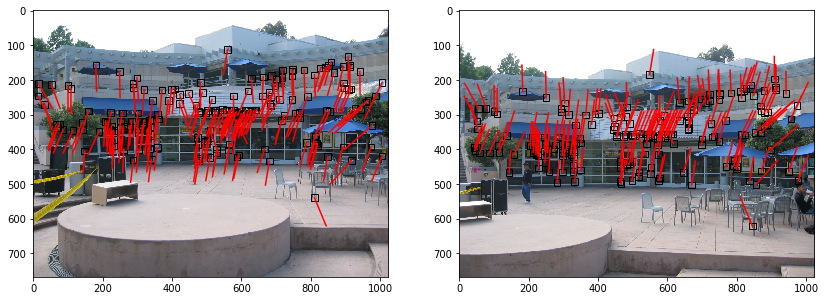

In [43]:
def MSAC(pts1, pts2, max_iters):
    import random
    import numpy as np
    
    def toHomo(x):
        return np.vstack((x,np.ones((1,x.shape[1]))))
    
    def fromHomo(x):
        # converts points from homogeneous to inhomogeneous coordinates
        return x[:-1,:]/x[-1,:]
    
    def model1(x1,x2):
        x1_homo = np.mat(toHomo(x1))
        x2_homo = np.mat(toHomo(x2))
        
        Ai = np.zeros((1,9))
        
        for i in range(x1.shape[1]):
            x1i = x1_homo[:,i]
            x2i = x2_homo[:,i]
            
            ai = np.kron(x2i.T, x1i.T)
            Ai = np.vstack((Ai, ai))
            
        Ai = np.delete(Ai, 0, 0)
        Ai = np.mat(Ai)

        U,S,Vt = np.linalg.svd(Ai)
        V = Vt.T
        
        F1 = V[:,-2].reshape(3,3)
        F2 = V[:,-1].reshape(3,3)

        a1 = F1[0,0]
        a2 = F1[0,1]
        a3 = F1[0,2]
        a4 = F1[1,0]
        a5 = F1[1,1]
        a6 = F1[1,2]
        a7 = F1[2,0]
        a8 = F1[2,1]
        a9 = F1[2,2]
        
        b1 = F2[0,0]
        b2 = F2[0,1]
        b3 = F2[0,2]
        b4 = F2[1,0]
        b5 = F2[1,1]
        b6 = F2[1,2]
        b7 = F2[2,0]
        b8 = F2[2,1]
        b9 = F2[2,2]
        
        Poly_0 = a1*a5*a9 - a1*a6*a8 - a2*a4*a9\
                + a2*a6*a7 + a3*a4*a8 - a3*a5*a7
            
        Poly_1 = a1*a5*b9 - a1*a6*b8 - a1*a8*b6\
                + a1*a9*b5 - a2*a4*b9 + a2*a6*b7\
                + a2*a7*b6 - a2*a9*b4 + a3*a4*b8\
                - a3*a5*b7 - a3*a7*b5 + a3*a8*b4\
                + a4*a8*b3 - a4*a9*b2 - a5*a7*b3\
                + a5*a9*b1 + a6*a7*b2 - a6*a8*b1
        
        Poly_2 = a1*b5*b9 - a1*b6*b8 - a2*b4*b9\
                + a2*b6*b7 + a3*b4*b8 - a3*b5*b7\
                - a4*b2*b9 + a4*b3*b8 + a5*b1*b9\
                - a5*b3*b7 - a6*b1*b8 + a6*b2*b7\
                + a7*b2*b6 - a7*b3*b5 - a8*b1*b6\
                + a8*b3*b4 + a9*b1*b5 - a9*b2*b4
        
        Poly_3 = b1*b5*b9 - b1*b6*b8 - b2*b4*b9\
                + b2*b6*b7 + b3*b4*b8 - b3*b5*b7
        
        alpha = np.roots([Poly_0, Poly_1, Poly_2, Poly_3])
        
        F0 = np.zeros((3,3,1))
        F0_t = np.zeros((3,3,1))
        for i in range(len(alpha)):
            if np.iscomplex(alpha[i]):
                continue
            alpha[i] = np.real(alpha[i])
            F0_t[:,:,0] = np.array(F1 * alpha[i] + F2)
            F0 = np.dstack((F0,F0_t))
        F0 = np.delete(F0,0,2)
        return F0
    
    def model2(pts1, pts2, F, tolerance):
        pts1 = np.mat(pts1)
        pts2 = np.mat(pts2)
        cost = np.inf
        for ind_f in range(F.shape[2]):
            Fi = F[:,:,ind_f]
            err = []
            inliers = []
            cost0 = 0
            
            for ind_x in range(pts1.shape[1]):
                x1i = pts1[0,ind_x]
                y1i = pts1[1,ind_x]
                x2i = pts2[0,ind_x]
                y2i = pts2[1,ind_x]
                
                Aif = x1i * x2i * Fi[0,0] + x1i * y2i * Fi[1,0]\
                    + x1i * Fi[2,0] + y1i * x2i * Fi[0,1]\
                    + y1i * y2i * Fi[1,1] + y1i * Fi[2,1]\
                    + x2i * Fi[0,2] + y2i * Fi[1,2] + Fi[2,2]
                
                
                Ji = np.mat(np.hstack(([x2i * Fi[0,0] + y2i * Fi[1,0] + Fi[2,0],\
                                    x2i * Fi[0,1] + y2i * Fi[1,1] + Fi[2,1], \
                                    x1i * Fi[0,0] + y1i * Fi[0,1] + Fi[0,2], \
                                    x1i * Fi[1,0] + y1i * Fi[1,1] + Fi[1,2]])))
        
                epsiloni = Aif
                lbd = np.float(-epsiloni / (Ji * Ji.T))
                #print('JiJiT',Ji * Ji.T )
                delta_i = Ji.T * lbd
                
                err.append(np.float(delta_i.T * delta_i))
                
                if np.float(delta_i.T * delta_i) > tolerance:
                    cost0 += tolerance
                else:
                    cost0 += np.float(delta_i.T * delta_i)
                    inliers.append(ind_x)
                    
            if cost0 < cost:
                cost = cost0
                ind_min = ind_f
                inliers0 = inliers
                F0 = Fi
                err0 = err 
        
        return F0, cost, inliers0
        
            
    cost = np.inf # MSAC cost
    iters = 0 # number of MSAC itterations executed
    x_len = pts1.shape[1]
    p = 0.99
    tolerance = 3.8415
    s = 7
    
    while (iters <= max_iters) and (cost > 0):
        
        iters = iters + 1
        ind_rand = random.sample(list(range(x_len)), 7)
        
        x1_sample = pts1[:, ind_rand]
        x2_sample = pts2[:, ind_rand]
        
        F0 = model1(x1_sample, x2_sample)
        F0, cost0, inliers0 = model2(pts1, pts2, F0, tolerance)
        
        if cost0 < cost:
            F = np.array(F0)
            cost = cost0
            inliers = inliers0
            
            w = len(inliers) / x_len

            max_iters = np.abs(np.log(1 - p) / np.log(1 - w**s))
    return F, inliers, cost, iters

# MSAC hyperparameters (add any additional hyperparameters necessary here. For example p)
# You should pass these hyperparameters as additional paramters to MSAC(...)
max_iters=10

F_MSAC, inliers, cost_MSAC, iters_MSAC = MSAC(pts1, pts2, max_iters)
print('inliers: ', inliers)
print('inlier count: ', len(inliers))

print('cost_MSAC=%f'%cost_MSAC)
print('||F_MSAC||=%f'%np.sqrt(np.sum(F_MSAC**2)))
print('F_MSAC')
print(F_MSAC/np.sqrt(np.sum(F_MSAC**2)))

# display the results
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
for i in range(inds[:,inliers].shape[1]):
    ii = inds[0,inliers[i]]
    jj = inds[1,inliers[i]]
    x1 = pts1_1[0,ii]
    x2 = pts2_1[0,jj]
    y1 = pts1_1[1,ii]
    y2 = pts2_1[1,jj]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w1/2,y1-w1/2),w1,w1, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w1/2,y2-w1/2),w1,w1, fill=False))
plt.show()

## Problem 5 (Programing): Linear Estimate (15 points)
  Estimate the fundamental matrix $\boldsymbol{F}_\text{DLT}$ from the
  resulting set of inlier correspondences using the direct linear
  transformation (DLT) algorithm (with data normalization).  Include
  the numerical values of the resulting $\boldsymbol{F}_\text{DLT}$, scaled
  such that $||\boldsymbol{F}_\text{DLT}||_\text{Fro} = 1$

In [44]:
def DLT(pts1, pts2):
    """your code here"""
    cost = np.inf # linear cost
    def norm_func(x_input):
        '''normalize function'''
        x_input = np.mat(x_input)
        mean_x = np.mean(x_input,1)
        var_x = np.var(x_input,1)
        sigma_x = np.sum(var_x)
        s_x = np.sqrt(x_input.shape[0] / sigma_x)
        
        T_x = np.mat(np.vstack(([s_x, 0, -s_x * mean_x[0,0]],\
                                [0, s_x, -s_x * mean_x[1,0]],\
                                [0, 0, 1])) )
        return T_x
    
    def toHomo(x):
        return np.vstack((x,np.ones((1,x.shape[1]))))
    
    def fromHomo(x):
        # converts points from homogeneous to inhomogeneous coordinates
        return x[:-1,:]/x[-1,:]
    
    def model2(pts1, pts2, F):
        pts1 = np.mat(pts1)
        pts2 = np.mat(pts2)
        cost = 0
        Fi = np.mat(F)
        
        for ind_x in range(pts1.shape[1]):
            x1i = pts1[0,ind_x]
            y1i = pts1[1,ind_x]
            x2i = pts2[0,ind_x]
            y2i = pts2[1,ind_x]

            Aif = x1i * x2i * Fi[0,0] + x1i * y2i * Fi[1,0]\
                + x1i * Fi[2,0] + y1i * x2i * Fi[0,1]\
                + y1i * y2i * Fi[1,1] + y1i * Fi[2,1]\
                + x2i * Fi[0,2] + y2i * Fi[1,2] + Fi[2,2]
            Ji = np.mat(np.hstack(([x2i * Fi[0,0] + y2i * Fi[1,0] + Fi[2,0],\
                                x2i * Fi[0,1] + y2i * Fi[1,1] + Fi[2,1], \
                                x1i * Fi[0,0] + y1i * Fi[0,1] + Fi[0,2], \
                                x1i * Fi[1,0] + y1i * Fi[1,1] + Fi[1,2]])))

            epsiloni = Aif
            lbd = np.float(-epsiloni / (Ji * Ji.T))
            delta_i = Ji.T * lbd
            cost = cost + np.float(delta_i.T * delta_i)
            
        return cost
    
    T_x1 = norm_func(pts1)
    T_x2 = norm_func(pts2)
    pts1 = np.mat(pts1)
    pts2 = np.mat(pts2)
    
    x1_norm = T_x1 * toHomo(pts1)
    x2_norm = T_x2 * toHomo(pts2)
    
    sigma = np.eye(2)
    sigma1_norm = T_x1[0:2,0:2].T * sigma * T_x1[0:2,0:2]
    sigma2_norm = T_x2[0:2,0:2].T * sigma * T_x2[0:2,0:2]
    
    x_len = pts1.shape[1]
    Ai = np.zeros((1,9))
    for i in range(x_len):
        x1i = x1_norm[:,i]
        x2i = x2_norm[:,i]
        ai = np.kron(x2i.T,x1i.T)
        Ai = np.vstack((Ai, ai))
    
    Ai = np.delete(Ai, 0, 0)
    U,S,Vt = np.linalg.svd(Ai)
    V = Vt.T
    
    F0 = V[:,-1].reshape(3,3)
    Uf,Sf,Vft = np.linalg.svd(F0)
    Sf[2] = 0
    F0 = Uf * np.diag(Sf) * Vft
    F = T_x2.T * F0 * T_x1
    
    F = F / np.linalg.norm(F)
    
    cost = model2( pts1, pts2,F)
    F = np.array(F)
    
    return F, cost

F_DLT, cost_DLT = DLT(pts1[:,inliers], pts2[:,inliers])
print('cost_DLT=%f'%cost_DLT)
print('||F_DLT||=%f'%np.sqrt(np.sum(F_DLT**2)))
print('F_DLT')
print(F_DLT/np.sqrt(np.sum(F_DLT**2)))

cost_DLT=77.389703
||F_DLT||=1.000000
F_DLT
[[-1.16109328e-08 -8.55826916e-06  2.80199851e-03]
 [ 7.16952417e-06 -7.04260553e-07  9.82101792e-03]
 [-2.84398376e-03 -8.51684631e-03 -9.99907531e-01]]


## Problem 6 (Programing): Nonlinear Estimate (55 points) 
  Retrieve the camera projection matrices $\boldsymbol{P} = [\boldsymbol{I} \,|\,
  \boldsymbol{0}]$ and $\boldsymbol{P}' = [\boldsymbol{M} \,|\, \boldsymbol{v}]$, where $\boldsymbol{M}$
  is full rank, from $\boldsymbol{F}_\text{DLT}$.  Use the resulting camera
  projection matrix $\boldsymbol{P}'$ associated with the second image and
  the triangulated 3D points as an initial estimate to an iterative
  estimation method, specifically the sparse Levenberg-Marquardt
  algorithm, to determine the Maximum Likelihood estimate of the
  fundamental matrix $\boldsymbol{F} = [\boldsymbol{v}]_\times \boldsymbol{M}$ that
  minimizes the reprojection error.  The initial estimate of the 3D
  points must be determined using the two-view optimal triangulation
  method described in lecture (algorithm 12.1 in the Hartley \&
  Zisserman book, but use the ray-plane intersection method for the
  final step instead of the homogeneous method).  Additionally, you
  must parameterize the camera projection matrix $\boldsymbol{P}'$ associated
  with the second image and the homogeneous 3D scene points that are
  being adjusted using the parameterization of homogeneous vectors
  (see section A6.9.2 (page 624) of the textbook, and the corrections
  and errata).

  Show the initial cost (i.e., the cost at iteration 0) and the cost at the end of each successive iteration. 
  Make sure to display with sufficient precision that we can see the error decrease (at least during the first step).

In [45]:
# feel free to modify the function signature as needed
# (pass parameterized F instead of homogeneous matrix, triangulated points, etc...)
def toHomo(x):
    return np.vstack((x,np.ones((1,x.shape[1]))))

def fromHomo(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1,:]/x[-1,:]

def F2P(F):
    F = np.mat(F)
    U,D,Vt = np.linalg.svd(F) 
    W = np.mat([[0,1,0],[-1,0,0],[0,0,0]])
    Z = np.mat([[0,-1,0],[1,0,0],[0,0,1]])
    D[2] = 0.5 * (D[0] + D[1])
    D = np.diag(D)
    F0 = U * W * Z * D * Vt
    S = U * W * U.T
    M = U * Z * D * Vt
    P_e = np.mat([[S[2,1]],[S[0,2]],[S[1,0]]])
    P = np.hstack((M,P_e))
    
    return P

def P2F(P):
    P = np.mat(P)
    M =P[:,:3]
    e = P[:,-1]
    
    e_x = X_mat(e)
    F = e_x * M
    
    return F

def X_mat(x_input):
    x_input = np.mat(x_input)
    assert x_input.shape[0] == 3
    assert x_input.shape[1] == 1
    x1 = x_input[0,0]
    x2 = x_input[1,0]
    x3 = x_input[2,0]
    
    x_matrix = np.array([[0, -x3, x2],[x3, 0, -x1],[-x2, x1, 0]])
    return x_matrix
    
    
def cost_evalueate( P, pts1, pts2, X):
    '''
    pts1 pts2 inHomo
    X inhomo
    all not normalized.
    '''
    pts1 = np.mat(pts1)
    pts2 = np.mat(pts2)
    X = toHomo(X)
    X = np.mat(X)
    
    P1 = np.hstack((np.eye(3),np.zeros((3,1))))
    P2 = P
    
    #print('thisis p2',P2)
    
    x1_eva = P1 * X
    x2_eva = P2 * X
    
    diff1 = pts1 - fromHomo(x1_eva)
    diff2 = pts2 - fromHomo(x2_eva)
    
    err1 = np.trace(diff1.T * diff1)
    err2 = np.trace(diff2.T * diff2)
    '''
    print(diff1[:,:4])
    print(diff2[:,:4])
    '''
    err = err1 + err2
    return err
    
def X_init( F, pts1, pts2, init = False):

    pts1_homo = np.mat(toHomo(pts1))
    pts2_homo = np.mat(toHomo(pts2))

    F = np.mat(F)
    cost = 0
    X_init = np.zeros((3,0))
    P2_mat = F2P(F)
    
    for i in range(pts1_homo.shape[1]):
        x1i = pts1_homo[0,i]
        y1i = pts1_homo[1,i]
        w1i = pts1_homo[2,i]

        x2i = pts2_homo[0,i]
        y2i = pts2_homo[1,i]
        w2i = pts2_homo[2,i]

        T1 = np.mat([[w1i, 0, -x1i],\
                     [0, w1i, -y1i],\
                     [0, 0, w1i]])
        
        T2 = np.mat([[w2i, 0, -x2i],\
                     [0, w2i, -y2i],\
                     [0, 0, w2i]])

        Fs = np.linalg.inv(T2).T * F * np.linalg.inv(T1)

        U1,S1,V1t = np.linalg.svd(Fs)
        V1 = V1t.T
        e1 = V1[:,-1]
        e1 = e1 / np.sqrt(np.float(e1[0,0]**2 + e1[1,0]**2))

        U2,S2,V2t = np.linalg.svd(Fs.T)
        V2 = V2t.T
        e2 = V2[:,-1]
        e2 = e2 / np.sqrt(np.float(e2[0,0]**2 + e2[1,0]**2))
        
        e1_1 = e1[0,0]
        e1_2 = e1[1,0]
        e1_3 = e1[2,0]

        e2_1 = e2[0,0]
        e2_2 = e2[1,0]
        e2_3 = e2[2,0]
        
        R1 = np.mat([[e1_1, e1_2, 0],[-e1_2, e1_1, 0],[0, 0, 1]])
        R2 = np.mat([[e2_1, e2_2, 0],[-e2_2, e2_1, 0],[0, 0, 1]])
        
        Fs = R2 * Fs * R1.T
        
        f = e1_3
        fp = e2_3
        a = Fs[1,1]
        b = Fs[1,2]
        c = Fs[2,1]
        d = Fs[2,2]

        Poly_0 = -a*c*f**4*(a*d - b*c)

        Poly_1 = (a**2 + c**2*fp**2)**2\
                - a*d*f**4*(a*d - b*c)\
                - b*c*f**4*(a*d - b*c)

        Poly_2 = 2*(a**2 + c**2*fp**2)*(2*c*d*fp**2 + 2*a*b)\
                - 2*a*c*f**2*(a*d - b*c) - b*d*f**4*(a*d - b*c)

        Poly_3 = 2*(a**2 + c**2*fp**2)*(b**2 + d**2*fp**2)\
                + (2*c*d*fp**2 + 2*a*b)**2\
                - 2*a*d*f**2*(a*d - b*c)\
                - 2*b*c*f**2*(a*d - b*c)

        Poly_4 = 2*(b**2 + d**2*fp**2)*(2*c*d*fp**2 + 2*a*b)\
                - a*c*(a*d - b*c) - 2*b*d*f**2*(a*d - b*c)

        Poly_5 = (b**2 + d**2*fp**2)**2 - a*d*(a*d - b*c) - b*c*(a*d - b*c)

        Poly_6 = -b*d*(a*d - b*c)

        t_roots = np.roots([Poly_0, Poly_1, Poly_2, Poly_3, Poly_4, Poly_5, Poly_6])

        cost_min = np.inf
        for t_ind in range(len(t_roots)):
            ti = t_roots[t_ind]
            ti = np.real(ti)
            if ti == np.inf:
                cost_t = 1/f**2 + c**2 / (a**2 + fp**2 * c**2)
            else:   
                cost_t = ti**2 / (1 + (f**2) * (ti**2))\
                        + (c*ti + d)**2 / ((a*ti + b)**2 +(fp**2) * (c*ti + d)**2)
 
            if cost_t < cost_min:
                t_min = ti
                
                cost_min = cost_t
        cost = cost + cost_min
        
        if init:

            l1 = np.vstack((t_min * f, 1, -t))
            l2 = np.vstack((-fp*(c*t_min+d), a*t_min+b, c*t_min+d))

            x_hat1 = np.vstack((-l1[0] * l1[2],\
                                -l1[1] * l1[2],\
                                l1[0] **2 + l1[1] **2))
            x_hat2 = np.vstack((-l2[0] * l2[2],\
                                -l2[1] * l2[2],\
                                l2[0] **2 + l2[1] **2))
   
            x_hat1 = np.linalg.inv(T1) * R1.T * x_hat1
            x_hat2 = np.linalg.inv(T2) * R2.T * x_hat2    
        
            lp = F * x_hat1
            lp_per = np.vstack((-lp[1] * x_hat2[2],\
                                lp[0] * x_hat2[2], \
                                lp[1] * x_hat2[0] - lp[0] * x_hat2[1]))
            
            Pln_pi = P2_mat.T * lp_per
            
            Pln_n = Pln_pi[:3,0]
            Pln_d = Pln_pi[-1,0]
            
            Xi = np.vstack((Pln_d * x_hat1, -Pln_n.T * x_hat1))
            X_init = np.hstack((X_init, fromHomo(Xi)))

    return X_init


def LMstep(P, pts1, pts2, l, v, X):
    """your code here"""
   
    def norm_func(x_input):
        '''normalize function'''
        x_input = np.mat(x_input)
        mean_x = np.mean(x_input,1)
        var_x = np.var(x_input,1)
        sigma_x = np.sum(var_x)
        s_x = np.float(np.sqrt(x_input.shape[0] / sigma_x))
        T_x = np.mat(np.eye(x_input.shape[0] + 1) * s_x)
        T_x[:-1,-1] = -s_x * mean_x
        T_x[-1,-1] = 1
        return T_x
    

    def dsinc_dx(x_input):
        '''calculate dsinc/dx'''
        val = np.cos(x_input) / x_input - np.sin(x_input)\
        / (x_input * x_input)
        return val
    
    def Para_fun(x_input):
        '''parameterization'''
        
        x_input = np.mat(x_input)
        assert x_input.shape[0] > 2
        assert x_input.shape[1] == 1
        
        
        x_input = x_input / np.linalg.norm(x_input)
        pi = np.pi
        a_x = x_input[0,0]
        b_x = x_input[1:,0]
        
        x_hat = 2 * b_x / (np.sinc(np.arccos(a_x) / pi))
        x_hat_norm = np.linalg.norm(x_hat)
        
        if x_hat_norm > pi:
            x_hat = (1 - 2 * pi / x_hat_norm *\
                 np.ceil((x_hat_norm - pi) / (2 * pi) )) * x_hat
            x_hat_norm = np.linalg.norm(x_hat)
            
        x_hat_norm_2 = x_hat_norm / 2
        
        if x_hat_norm == 0:
            da_dx = np.zeros((1,b_x.shape[0]))
            db_dx = 0.5 * np.eye(b_x.shape[0])
        
        else:
            da_dx = -0.5 * b_x.T
            db_dx = 0.5 * np.sinc(x_hat_norm_2 / pi) * np.eye(b_x.shape[0]) + \
                    1 / (4 * x_hat_norm) * dsinc_dx(x_hat_norm_2) * \
                    x_hat * x_hat.T
        
        dx_dx = np.vstack((da_dx, db_dx))
        
        return dx_dx, x_hat      
    
    def fromPara(x_input):
        '''deparameterization'''
        x_input = np.mat(x_input)
        pi = np.pi
        x_input_norm = np.linalg.norm(x_input)
        if x_input_norm > pi:
            x_input = (1 - 2 * pi / x_input_norm *\
                 np.ceil((x_input_norm - pi) / (2 * pi) )) * x_input
            x_input_norm = np.linalg.norm(x_input)
        x_input_norm_2 = x_input_norm / 2
        
        a = np.cos(x_input_norm_2)
        b = np.sinc(x_input_norm_2 / np.pi) * x_input /2
        
        x_out = np.vstack((a, b))
        return x_out
    
    # ------------------------ Main start
    
    pts1 = np.mat(pts1)
    pts2 = np.mat(pts2)
    P = np.mat(P)
    
    #------------------------- DN part
    
    T_x1 = norm_func(pts1)
    T_x2 = norm_func(pts2)
    T_X = norm_func(X)
    
    x1_norm = T_x1 * toHomo(pts1)
    x2_norm = T_x2 * toHomo(pts2)
    X_norm = T_X * toHomo(X)
    
    sigma = np.eye(2)
    sigma1_norm = T_x1[0:2,0:2].T * sigma * T_x1[0:2,0:2]
    sigma2_norm = T_x2[0:2,0:2].T * sigma * T_x2[0:2,0:2]
    
    # ----------------------------------------------
  
    P1 = np.hstack((np.eye(3), np.zeros((3,1))))
    P2 = P

    P1_norm = T_x1 * P1 * np.linalg.inv(T_X) #fixed
    P2_norm = T_x2 * P2 * np.linalg.inv(T_X) #adjust
    
    P1_norm = P1_norm / np.linalg.norm(P1_norm)
    P2_norm = P2_norm / np.linalg.norm(P2_norm)
    
    # ----------------------------------------------
    
    dp_dp, p_hat = Para_fun(P2_norm.reshape(12,1))
    
    U = np.zeros((11, 11))
    V_save = np.zeros((3, 3, 0))
    W_save = np.zeros((11, 3, 0))
    eps_a = np.zeros((11, 1))
    eps_b_save = np.zeros((3, 0))
    Xi_hat_save = np.zeros((3, 0))
    
    for i in range(pts1.shape[1]):
        x1i = x1_norm[:,i]
        x2i = x2_norm[:,i]
        Xi = X_norm[:,i]
        
        w_p1 = np.float(P1_norm[2,:] * Xi)
        w_p2 = np.float(P2_norm[2,:] * Xi)
        
        dx_bar_dx, Xi_hat = Para_fun(Xi)
        
        Xi_hat_save = np.hstack((Xi_hat_save, Xi_hat))
        
        # ---------------------------------- for Ai
        
        dx_dp1 = np.hstack((Xi.T, np.zeros((1,4)), -x2i[0,0] * Xi.T))
    
        dx_dp2 = np.hstack((np.zeros((1,4)), Xi.T, -x2i[1,0] * Xi.T))
        dx_dp = np.vstack((dx_dp1,dx_dp2)) / w_p2
        Ai = dx_dp * dp_dp

        # ---------------------------------- for B1i
        
        dx_dx_bar1 = np.vstack(( P1_norm[0,:] - x1i[0,0] * P1_norm[2,:] ,\
                                 P1_norm[1,:] - x1i[1,0] * P1_norm[2,:])) / w_p1
        B1i = dx_dx_bar1 * dx_bar_dx
        
        # ---------------------------------- for B2i
    
        dx_dx_bar2 = np.vstack(( P2_norm[0,:] - x2i[0,0] * P2_norm[2,:] ,\
                                 P2_norm[1,:] - x2i[1,0] * P2_norm[2,:])) / w_p2
        B2i = dx_dx_bar2 * dx_bar_dx
    
        # ---------------------------------- 
        
        U = U + Ai.T * np.linalg.inv(sigma2_norm) * Ai
        
        Vi = B1i.T * np.linalg.inv(sigma1_norm) * B1i +\
            B2i.T * np.linalg.inv(sigma2_norm) * B2i
            
        V_save = np.dstack((V_save, np.array(Vi)))
        
        Wi = Ai.T * np.linalg.inv(sigma2_norm) * B2i 
        
        W_save = np.dstack((W_save, np.array(Wi)))
        
        # ------------------------------------- for eps_a
        
        eps1i = fromHomo(x1i) - fromHomo(P1_norm * Xi)
        eps2i = fromHomo(x2i) - fromHomo(P2_norm * Xi)
        eps_a = eps_a + Ai.T * np.linalg.inv(sigma2_norm) * eps2i
        
        eps_bi = B1i.T * np.linalg.inv(sigma1_norm) * eps1i +\
                 B2i.T * np.linalg.inv(sigma2_norm) * eps2i
            
        eps_b_save = np.hstack((eps_b_save, eps_bi)) 
        
    # ------------------------------------- While True
    
    cost = cost_evalueate(P, pts1, pts2, X)
    count = 0
    
    while True:

        U_star = U + l * np.eye(11)
        S_2 = np.zeros((11,11))
        eA_2 = np.zeros((11,1))
        
        for i in range(pts1.shape[1]):
            V_star = np.mat(V_save[:,:,i] + l * np.eye(3))
            Wi = np.mat(W_save[:,:,i])
            eps_bi = eps_b_save[:,i]

            S_2 = S_2 + Wi * np.linalg.inv(V_star) * Wi.T
            eA_2 = eA_2 + Wi * np.linalg.inv(V_star) * eps_bi

        S_star = U_star - S_2
        eA = eps_a - eA_2
        delta_a = np.linalg.solve(S_star, eA)

        X_hat0 = np.zeros((4,0))

        for i in range(pts1.shape[1]):
            
            V_star = np.mat(V_save[:,:,i] + l * np.eye(3))
            Wi = np.mat(W_save[:,:,i])
            eps_bi = eps_b_save[:,i]
            delta_bi = np.linalg.inv(V_star) * (eps_bi - Wi.T * delta_a)
            Xi_hat = Xi_hat_save[:,i]
            X_hat0 = np.hstack((X_hat0, fromPara(Xi_hat + delta_bi )))
            

        P0 = p_hat + delta_a
        P0 = fromPara(P0).reshape(3,4)
        
        # ----------------------------------- cost compare
        
        X_hat1 = fromHomo(np.linalg.inv(T_X) * X_hat0)
        P2_0 = np.linalg.inv(T_x2) * P0 * T_X #adjust
        
        P2_0 = P2_0 / np.linalg.norm(P2_0)
        
        cost_0 =cost_evalueate(P2_0, pts1, pts2, X_hat1) 

        
        #print(cost, cost_0)
        if cost_0 < cost:
            cost = cost_0
            l = l / v
            P = P2_0
            X = X_hat1
            break
            
        else:
            l = l * v
            count += 1
            if count == 30:
                break

    return X, np.array(P), cost, l


# LM hyperparameters
l=.001
v=10
max_iters=10

F_LM = F_DLT

# LM optimization loop
# -------------------------initialize X_LM 
'''
X_LM0 = toHomo(pts1[:,inliers])
X_LM = np.mat(np.vstack((X_LM0, np.zeros((1, X_LM0.shape[1])))))
'''
pts1_0 = pts1[:,inliers]
pts2_0 = pts2[:,inliers]

X_LM = X_init( F_LM, pts1_0, pts2_0, init = True)
P_LM = F2P(F_LM)
P_LM = P_LM / np.linalg.norm(P_LM)
cost0 = cost_evalueate(P_LM, pts1_0, pts2_0, X_LM)

print ('iter 0 cost %f'%cost0)
for i in range(max_iters):
    X_LM, P_LM, cost_LM, l = LMstep(P_LM, pts1[:,inliers], pts2[:,inliers], l, v, X_LM)
    print ('iter %d cost %f'%(i+1, cost_LM))

F_LM = P2F(P_LM) 
F_LM = np.array(F_LM / np.linalg.norm(F_LM))
print('||F_LM||=%f'%np.sqrt(np.sum(F_LM**2)))
print('F_LM')
print(F_LM/np.sqrt(np.sum(F_LM**2)))

iter 0 cost 151.056206
iter 1 cost 147.830582
iter 2 cost 147.830582
iter 3 cost 147.830582
iter 4 cost 147.830582
iter 5 cost 147.830582
iter 6 cost 147.830582
iter 7 cost 147.830582
iter 8 cost 147.830582
iter 9 cost 147.830582
iter 10 cost 147.830582
||F_LM||=1.000000
F_LM
[[-9.50320389e-09 -8.55876815e-06  2.80203995e-03]
 [ 7.16979288e-06 -7.04327377e-07  9.82100199e-03]
 [-2.84196098e-03 -8.51733504e-03 -9.99907533e-01]]


## Problem 7 (Programing): Point to line mapping (10 points)
  Qualitatively determine the accuracy of $\boldsymbol{F}_\text{LM}$ by
  mapping points in image 1 to epipolar lines in image 2.  Choose
  three distinct points $\boldsymbol{x}_{\{1,2,3\}}$ distributed in image 1
  that are not in the set of inlier correspondences and map them to
  epipolar lines $\boldsymbol{l}'_{\{1,2,3\}} = \boldsymbol{F}_\text{LM}
  \boldsymbol{x}_{\{1,2,3\}}$ in the second image under the fundamental
  matrix $\boldsymbol{F}_\text{LM}$.

  Include a figure containing the pair of images,
  where the three points in image 1 are indicated by a square (or
  circle) about the feature and the corresponding epipolar lines are
  drawn in image 2. (hint: each line $\boldsymbol{l}'_i$ should pass through the point
  $\boldsymbol{x}'_i$ in image 2 that corresponds to the point $\boldsymbol{x}_i$
  in image 1).

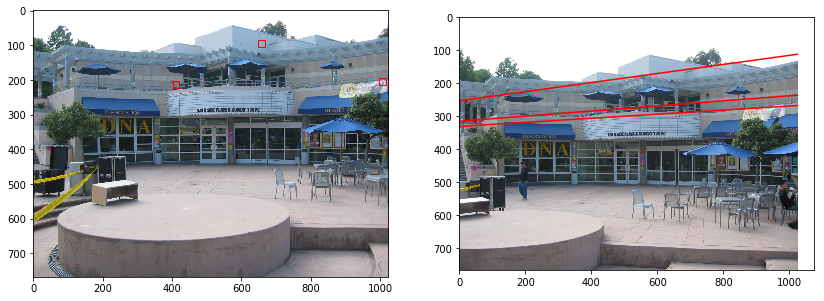

In [60]:
"""your code here"""
import random

x1_0 = np.mat(np.zeros((2,3)))
F = np.mat(F_LM)

        
ind_rand_x = random.sample(list(range(I1.shape[1])), 3)       
ind_rand_y = random.sample(list(range(I1.shape[0])), 3)

x1_0[0,:] = np.array(ind_rand_x)
x1_0[1,:] = np.array(ind_rand_y)

l2 = F * toHomo(x1_0)
l2_1 = l2[:,0]
l2_2 = l2[:,1]
l2_3 = l2[:,2]

plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(I1)
ax2.imshow(I2)
w1 = 19

for i in range(x1_3.shape[1]):
    x1i = x1_0[0,i]
    y1i = x1_0[1,i]
    
    #x2i = x2_3[0,i]
    #y2i = x2_3[1,i]
    
    ali = l2[0,i]
    bli = l2[1,i]
    cli = l2[2,i]
    
    #ax1.plot([x1i, x2i],[y1i, y2i],'-r')
    ax1.add_patch(patches.Rectangle((x1i-w1/2,y1i-w1/2),\
                            w1,w1, fill=False, color = 'r'))
    #ax2.plot([x2i, x1i],[y2i, y1i],'-r')
    #ax2.add_patch(patches.Rectangle((x2i-w1/2,y2i-w1/2),w1,w1, fill=False, color = 'r'))
    
    x_srt = 0
    x_end = I1.shape[1]
    
    y_srt = -ali * x_srt / bli - cli / bli
    y_end = -ali * x_end / bli - cli / bli
    ax2.plot([x_srt,x_end],[y_srt,y_end],'-r')
    
    #y = -ax/b - c/b
    
plt.show()



